## Вариант №3

## Задание
Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

Датасет https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine - набор данных о вине.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [13]:
# Импортируем датасет из sklearn.
from sklearn.datasets import load_wine
wine=load_wine()

# Преобразуем в датасет для pandas.
data=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])

# Проверяем данные после преобразования.
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [16]:
# Ищем пропуски.
(data.isnull() | data.empty | data.isna()).sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

## Выбор метрик и подготовка данных

Так как выполняется задача небинарной классификации и в тестовой выборке возможен дисбаланс классов, были выбраны следующие метрики:

- precision;
- recall;
- f1-score.

Всем метрикам был задан уровень детализации average='weighted'.

In [17]:
def print_metrics(y_test, y_pred):
    rep = classification_report(y_test, y_pred, output_dict=True)
    print("weighted precision:", rep['weighted avg']['precision'])
    print("weighted recall:", rep['weighted avg']['recall'])
    print("weighted f1-score:", rep['weighted avg']['f1-score'])
    plt.figure(figsize=(4, 3))
    plt.title('Матрица ошибок')
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues");

In [135]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(['target'], axis=1), data['target'], test_size=0.5, random_state=27)

## Масштабирование данных

In [136]:
scaler = StandardScaler().fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_train.columns)
x_train_scaled.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01
mean,-1.616684e-15,-4.004288e-16,1.182575e-15,6.711236e-16,1.496930e-17,1.796316e-15,-6.162362e-16,-3.517785e-16,8.093557e-16,-2.033525e-16,-9.689503e-16,1.091511e-15,-1.060325e-16
std,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00
min,-2.121506e+00,-1.565042e+00,-2.311900e+00,-2.434169e+00,-1.549464e+00,-1.705957e+00,-1.772852e+00,-1.750131e+00,-1.912147e+00,-1.340559e+00,-2.284093e+00,-2.045442e+00,-1.499092e+00
25%,-7.679090e-01,-6.076227e-01,-5.943782e-01,-6.139109e-01,-7.921375e-01,-9.584166e-01,-8.252971e-01,-7.781395e-01,-6.138906e-01,-7.600287e-01,-6.813261e-01,-8.128654e-01,-8.001863e-01
50%,-2.726134e-02,-4.182430e-01,2.392951e-02,-3.749595e-02,-1.725065e-01,1.549407e-01,1.329041e-01,-2.921436e-01,-1.133580e-01,-1.665975e-01,2.091001e-01,2.747025e-01,-3.072084e-01
75%,7.772352e-01,5.602187e-01,7.796389e-01,5.389190e-01,4.471245e-01,7.911450e-01,8.568783e-01,6.798482e-01,5.279495e-01,4.010323e-01,6.988345e-01,7.822342e-01,8.004317e-01
max,2.143602e+00,2.622353e+00,2.909365e+00,3.269306e+00,4.233758e+00,2.429371e+00,1.719259e+00,2.218835e+00,3.046254e+00,3.411190e+00,2.034474e+00,1.652289e+00,2.460332e+00


## SVC

## Базовая модель

Без масштабирования:

weighted precision: 0.7540359033966163
weighted recall: 0.7415730337078652
weighted f1-score: 0.7443483482809325


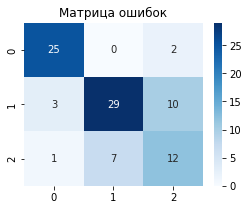

In [103]:
svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)
print_metrics(y_test, y_pred_svm)

С масштабированием:

weighted precision: 0.967088178104895
weighted recall: 0.9662921348314607
weighted f1-score: 0.96650014692918


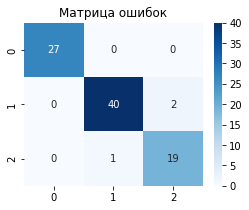

In [104]:
svm_model = SVC()
svm_model.fit(x_train_scaled, y_train)
y_pred_svm = svm_model.predict(x_test_scaled)
print_metrics(y_test, y_pred_svm)

## Подбор гиперпараметров

In [105]:
params = {'C': np.concatenate([np.arange(0.1, 2, 0.03), np.arange(2, 20, 1)])}
grid_cv = GridSearchCV(estimator=svm_model, param_grid=params, cv=10, n_jobs=-1, scoring='f1_macro')
grid_cv.fit(x_train_scaled, y_train)
print(grid_cv.best_params_)

{'C': 0.13}


## Лучшая модель

weighted precision: 1.0
weighted recall: 1.0
weighted f1-score: 1.0


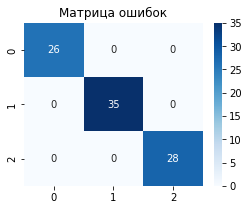

In [137]:
best_svm_model = grid_cv.best_estimator_
best_svm_model.fit(x_train_scaled, y_train)
y_pred_svm = best_svm_model.predict(x_test_scaled)
print_metrics(y_test, y_pred_svm)

## RandomForestClassifier

## Базовая модель

weighted precision: 0.9445247636258872
weighted recall: 0.9438202247191011
weighted f1-score: 0.9436376329325608


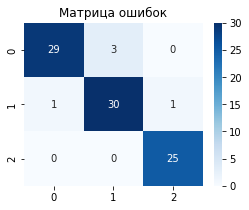

In [130]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)
y_pred_rfc = rfc_model.predict(x_test)
print_metrics(y_test, y_pred_rfc)

## Подбор гиперпараметров

In [131]:
params = {'n_estimators': [5, 10, 50, 100], 'max_features': [2, 3, 4], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 2, 3, 4, 5]}
grid_cv = GridSearchCV(estimator=rfc_model, param_grid=params, cv=10, n_jobs=-1, scoring='f1_weighted')
grid_cv.fit(x_train, y_train)
print(grid_cv.best_params_)

{'criterion': 'gini', 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 100}


## Лучшая модель

weighted precision: 0.9783007254917369
weighted recall: 0.9775280898876404
weighted f1-score: 0.9773622265701662


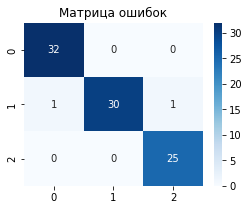

In [132]:
best_rfc_model = grid_cv.best_estimator_
best_rfc_model.fit(x_train, y_train)
y_pred_rfc = best_rfc_model.predict(x_test)
print_metrics(y_test, y_pred_rfc)

## Сравнение результатов

SVC result

weighted precision: 1.0
weighted recall: 1.0
weighted f1-score: 1.0


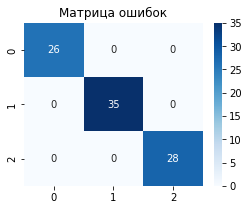

In [138]:
print("SVC result\n")
print_metrics(y_test, y_pred_svm)

RandomForestClassifier result

weighted precision: 0.9783007254917369
weighted recall: 0.9775280898876404
weighted f1-score: 0.9773622265701662


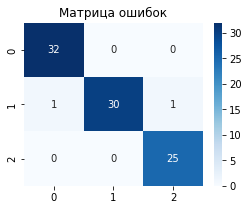

In [134]:
print("RandomForestClassifier result\n")
print_metrics(y_test, y_pred_rfc)

## Выводы:

Модели с подобранными гиперпараметрами оказались лучше базовых моделей. Обе конечные модели показали очень высокую точность прогноза, что объясняется спецификой используемого "игрушечного" датасета. Из матриц ошибок видим, что модель RandomForestClassifier совершила 2 неверных прогноза из 89. Метрики показывают, что качество рассматриваемой модели RandomForestClassifier хуже SVC, что обосновывается размером тестовой выборки данных.